Here, we explore the effect of cosmology on the lensing mass density estimates.

In [1]:
from astropy import units as u
from astropy import constants as const
import numpy as np
from astropy.cosmology import Flatw0waCDM
import matplotlib.pyplot as plt
import corner
from astropy.table import Table
from itertools import combinations
from ltsfit.ltsfit import ltsfit

def calculate_critical_surface_density(z_lens, z_source, cosmo):
    D_L = cosmo.angular_diameter_distance(z_lens)
    D_S = cosmo.angular_diameter_distance(z_source)
    D_LS = cosmo.angular_diameter_distance_z1z2(z_lens, z_source)

    Sigma_c = (const.c**2 / (4 * np.pi * const.G)) * D_S / (D_LS * D_L)
    return Sigma_c.to(u.Msun / u.pc**2)

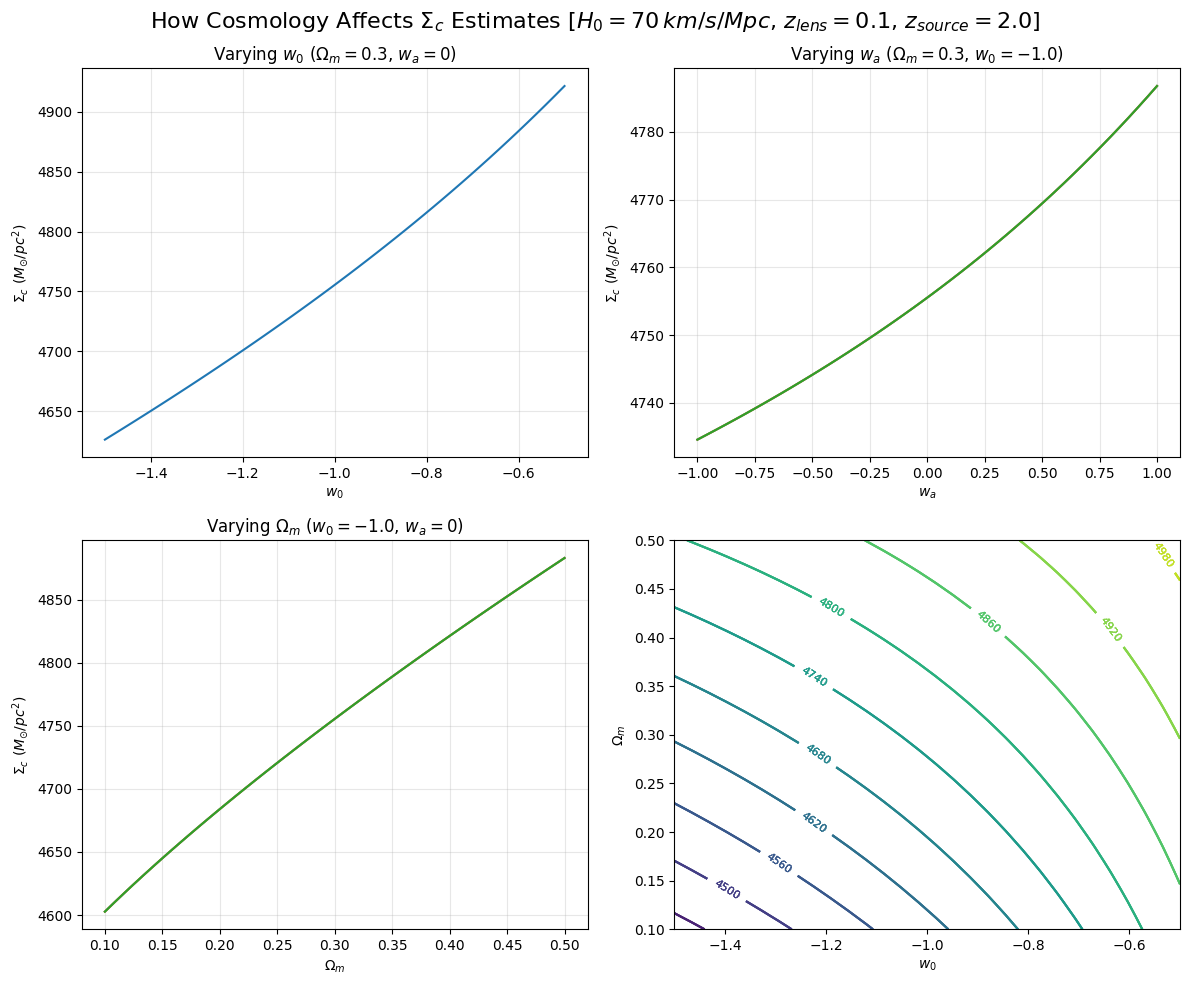

In [2]:
z_lens = 0.1
z_source = 2.0
H0 = 70 * u.km / (u.s * u.Mpc)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Vary w0 (keep Om0=0.3, wa=0, H0=70)
w0_vals_plot = np.linspace(-1.5, -0.5, 50)
Sigma_c_w0 = []
for w0_val in w0_vals_plot:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=0.3, w0=w0_val, wa=0)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_w0.append(Sigma_c_temp.value)

axes[0,0].plot(w0_vals_plot, Sigma_c_w0)
axes[0,0].set_xlabel('$w_0$')
axes[0,0].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[0,0].set_title('Varying $w_0$ ($\\Omega_m=0.3$, $w_a=0$)')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Vary wa (keep Om0=0.3, w0=-1.0, H0=70)
wa_vals = np.linspace(-1.0, 1.0, 50)
Sigma_c_wa = []
for wa_val in wa_vals:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=0.3, w0=-1.0, wa=wa_val)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_wa.append(Sigma_c_temp.value)

axes[0,1].plot(wa_vals, Sigma_c_wa)
axes[0,1].set_xlabel('$w_a$')
axes[0,1].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[0,1].set_title('Varying $w_a$ ($\\Omega_m=0.3$, $w_0=-1.0$)')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Vary Om0 (keep w0=-1.0, wa=0, H0=70)
Om0_vals = np.linspace(0.1, 0.5, 50)
Sigma_c_Om0 = []
for Om0_val in Om0_vals:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=-1.0, wa=0)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_Om0.append(Sigma_c_temp.value)

axes[1,0].plot(Om0_vals, Sigma_c_Om0)
axes[1,0].set_xlabel('$\\Omega_m$')
axes[1,0].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[1,0].set_title('Varying $\\Omega_m$ ($w_0=-1.0$, $w_a=0$)')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Show parameter space (w0 vs Om0 as contour)
w0_grid = np.linspace(-1.5, -0.5, 30)
Om0_grid = np.linspace(0.1, 0.5, 30)
W0, OM0 = np.meshgrid(w0_grid, Om0_grid)
Sigma_c_grid = np.zeros_like(W0)

for i, w0_val in enumerate(w0_grid):
    for j, Om0_val in enumerate(Om0_grid):
        cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=w0_val, wa=0)
        Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
        Sigma_c_grid[j, i] = Sigma_c_temp.value

contour = axes[1,1].contour(W0, OM0, Sigma_c_grid, levels=10)
axes[1,1].clabel(contour, inline=True, fontsize=8)
axes[1,1].set_xlabel('$w_0$')
axes[1,1].set_ylabel('$\\Omega_m$')

# Plot 2: Vary wa (keep Om0=0.3, w0=-1.0, H0=70)
wa_vals = np.linspace(-1.0, 1.0, 50)
Sigma_c_wa = []
for wa_val in wa_vals:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=0.3, w0=-1.0, wa=wa_val)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_wa.append(Sigma_c_temp.value)

axes[0,1].plot(wa_vals, Sigma_c_wa)
axes[0,1].set_xlabel('$w_a$')
axes[0,1].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[0,1].set_title('Varying $w_a$ ($\\Omega_m=0.3$, $w_0=-1.0$)')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Vary Om0 (keep w0=-1.0, wa=0, H0=70)
Om0_vals = np.linspace(0.1, 0.5, 50)
Sigma_c_Om0 = []
for Om0_val in Om0_vals:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=-1.0, wa=0)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_Om0.append(Sigma_c_temp.value)

axes[1,0].plot(Om0_vals, Sigma_c_Om0)
axes[1,0].set_xlabel('$\\Omega_m$')
axes[1,0].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[1,0].set_title('Varying $\\Omega_m$ ($w_0=-1.0$, $w_a=0$)')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Show parameter space (w0 vs Om0 as contour)
w0_grid = np.linspace(-1.5, -0.5, 30)
Om0_grid = np.linspace(0.1, 0.5, 30)
W0, OM0 = np.meshgrid(w0_grid, Om0_grid)
Sigma_c_grid = np.zeros_like(W0)

for i, w0_val in enumerate(w0_grid):
    for j, Om0_val in enumerate(Om0_grid):
        cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=w0_val, wa=0)
        Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
        Sigma_c_grid[j, i] = Sigma_c_temp.value

contour = axes[1,1].contour(W0, OM0, Sigma_c_grid, levels=10)
axes[1,1].clabel(contour, inline=True, fontsize=8)
axes[1,1].set_xlabel('$w_0$')
axes[1,1].set_ylabel('$\\Omega_m$')

# Plot 2: Vary wa (keep Om0=0.3, w0=-1.0, H0=70)
wa_vals = np.linspace(-1.0, 1.0, 50)
Sigma_c_wa = []
for wa_val in wa_vals:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=0.3, w0=-1.0, wa=wa_val)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_wa.append(Sigma_c_temp.value)

axes[0,1].plot(wa_vals, Sigma_c_wa)
axes[0,1].set_xlabel('$w_a$')
axes[0,1].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[0,1].set_title('Varying $w_a$ ($\\Omega_m=0.3$, $w_0=-1.0$)')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Vary Om0 (keep w0=-1.0, wa=0, H0=70)
Om0_vals = np.linspace(0.1, 0.5, 50)
Sigma_c_Om0 = []
for Om0_val in Om0_vals:
    cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=-1.0, wa=0)
    Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
    Sigma_c_Om0.append(Sigma_c_temp.value)

axes[1,0].plot(Om0_vals, Sigma_c_Om0)
axes[1,0].set_xlabel('$\\Omega_m$')
axes[1,0].set_ylabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
axes[1,0].set_title('Varying $\\Omega_m$ ($w_0=-1.0$, $w_a=0$)')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Show parameter space (w0 vs Om0 as contour)
w0_grid = np.linspace(-1.5, -0.5, 30)
Om0_grid = np.linspace(0.1, 0.5, 30)
W0, OM0 = np.meshgrid(w0_grid, Om0_grid)
Sigma_c_grid = np.zeros_like(W0)

for i, w0_val in enumerate(w0_grid):
    for j, Om0_val in enumerate(Om0_grid):
        cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=w0_val, wa=0)
        Sigma_c_temp = calculate_critical_surface_density(z_lens, z_source, cosmo_temp)
        Sigma_c_grid[j, i] = Sigma_c_temp.value

contour = axes[1,1].contour(W0, OM0, Sigma_c_grid, levels=10)
axes[1,1].clabel(contour, inline=True, fontsize=8)
axes[1,1].set_xlabel('$w_0$')
axes[1,1].set_ylabel('$\\Omega_m$')

fig.suptitle('How Cosmology Affects $\\Sigma_c$ Estimates [$H_0=70 \\, km/s/Mpc$, $z_{lens}=$'+f'{z_lens}, '+'$z_{source}=$'+f'{z_source}]', fontsize=16)

fig.tight_layout()

stddev of mean Sigma_c values across cosmologies: 3068.220260999734
mean of mean Sigma_c values across cosmologies: 15010.442713337536
percentage variation in mean Sigma_c values across cosmologies: 20.440571404822492 %


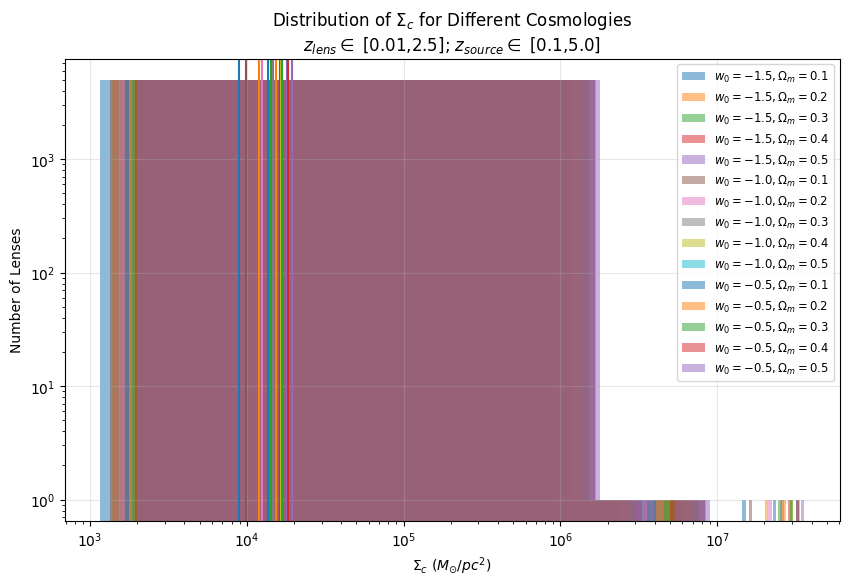

In [3]:
# now we see how Sigma_c changes with cosmology for a population of lenses

z_lens_vals = np.linspace(0.01, 2.5, 5000)
z_source_vals = []
i = 0
while i < len(z_lens_vals):
    z_lens = z_lens_vals[i]
    z_source = np.random.uniform(0.1, 5.0)
    if z_source > z_lens:
        z_source_vals.append(z_source)
        i += 1
z_source_vals = np.array(z_source_vals)

w0_grid = np.array([-1.5, -1.0, -0.5])
Om0_grid = np.array([0.1, 0.2, 0.3,0.4, 0.5])

Sigma_c_matrix = np.zeros((len(z_lens_vals), len(w0_grid), len(Om0_grid)))
# calaculate Sigma_c function can handle array inputs for z_lens, z_source 

for j, w0_val in enumerate(w0_grid):
    for k, Om0_val in enumerate(Om0_grid):
        cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=w0_val, wa=0)
        Sigma_c_temp = calculate_critical_surface_density(z_lens_vals, z_source_vals, cosmo_temp)
        Sigma_c_matrix[:, j, k] = Sigma_c_temp.value

# Show histograms of Sigma_c for different cosmologies in same plot
plt.figure(figsize=(10, 6))
for j, w0_val in enumerate(w0_grid):
    for k, Om0_val in enumerate(Om0_grid):
        plt.hist(Sigma_c_matrix[:, j, k], bins=20, alpha=0.5, label=f'$w_0={w0_val}, \\Omega_m={Om0_val}$')
plt.xlabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
plt.ylabel('Number of Lenses')
plt.title('Distribution of $\\Sigma_c$ for Different Cosmologies\n'+'$z_{lens}\\in$ ['+str(z_lens_vals.min())+','+str(z_lens_vals.max())+']'+'; $z_{source}\\in$ ['+f'{z_source_vals.min():.1f},{z_source_vals.max():.1f}]')
plt.legend(loc ='upper right', fontsize='small')
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.yscale('log')


# Mean and stddev of Sigma_c for different cosmologies
mean_Sigma_c_vals = np.mean(Sigma_c_matrix, axis=0)
stddev_Sigma_c_vals = np.std(Sigma_c_matrix, axis=0)

num = 0
for j, w0_val in enumerate(w0_grid):
    for k, Om0_val in enumerate(Om0_grid):
        mean_val = mean_Sigma_c_vals[j, k]
        stddev_val = stddev_Sigma_c_vals[j, k]

        # overplot mean and stddev on histograms as vertical lines
        plt.axvline(mean_val, linestyle='-', color='C'+str(num))
        num += 1

print("stddev of mean Sigma_c values across cosmologies:", np.std(mean_Sigma_c_vals))
print("mean of mean Sigma_c values across cosmologies:", np.mean(mean_Sigma_c_vals))
print("percentage variation in mean Sigma_c values across cosmologies:", np.std(mean_Sigma_c_vals)/np.mean(mean_Sigma_c_vals)*100, "%")

stddev of mean Sigma_c values across cosmologies: 2128.1247298178987
mean of mean Sigma_c values across cosmologies: 11227.901281470175
percentage variation in mean Sigma_c values across cosmologies: 18.953895981700715 %


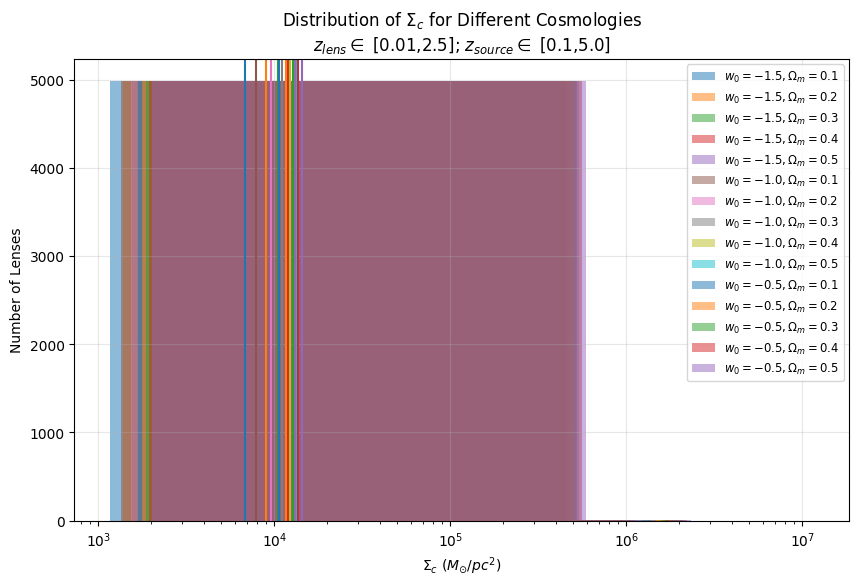

In [4]:
# now we see how Sigma_c changes with cosmology for a population of lenses

z_lens_vals = np.linspace(0.01, 2.5, 5000)
z_source_vals = []
i = 0
while i < len(z_lens_vals):
    z_lens = z_lens_vals[i]
    z_source = np.random.uniform(0.1, 5.0)
    if z_source > z_lens:
        z_source_vals.append(z_source)
        i += 1
z_source_vals = np.array(z_source_vals)

w0_grid = np.array([-1.5, -1.0, -0.5])
Om0_grid = np.array([0.1, 0.2, 0.3,0.4, 0.5])

Sigma_c_matrix = np.zeros((len(z_lens_vals), len(w0_grid), len(Om0_grid)))
# calaculate Sigma_c function can handle array inputs for z_lens, z_source 

for j, w0_val in enumerate(w0_grid):
    for k, Om0_val in enumerate(Om0_grid):
        cosmo_temp = Flatw0waCDM(H0=H0, Om0=Om0_val, w0=w0_val, wa=0)
        Sigma_c_temp = calculate_critical_surface_density(z_lens_vals, z_source_vals, cosmo_temp)
        Sigma_c_matrix[:, j, k] = Sigma_c_temp.value

# Show histograms of Sigma_c for different cosmologies in same plot
plt.figure(figsize=(10, 6))
for j, w0_val in enumerate(w0_grid):
    for k, Om0_val in enumerate(Om0_grid):
        plt.hist(Sigma_c_matrix[:, j, k], bins=20, alpha=0.5, label=f'$w_0={w0_val}, \\Omega_m={Om0_val}$')
plt.xlabel('$\\Sigma_c$ ($M_{\\odot} / pc^2$)')
plt.ylabel('Number of Lenses')
plt.title('Distribution of $\\Sigma_c$ for Different Cosmologies\n'+'$z_{lens}\\in$ ['+str(z_lens_vals.min())+','+str(z_lens_vals.max())+']'+'; $z_{source}\\in$ ['+f'{z_source_vals.min():.1f},{z_source_vals.max():.1f}]')
plt.legend(loc ='upper right', fontsize='small')
plt.grid(True, alpha=0.3)
plt.xscale('log')
# plt.yscale('log')


# Mean and stddev of Sigma_c for different cosmologies
mean_Sigma_c_vals = np.mean(Sigma_c_matrix, axis=0)
stddev_Sigma_c_vals = np.std(Sigma_c_matrix, axis=0)

num = 0
for j, w0_val in enumerate(w0_grid):
    for k, Om0_val in enumerate(Om0_grid):
        mean_val = mean_Sigma_c_vals[j, k]
        stddev_val = stddev_Sigma_c_vals[j, k]

        # overplot mean and stddev on histograms as vertical lines
        plt.axvline(mean_val, linestyle='-', color='C'+str(num))
        num += 1

print("stddev of mean Sigma_c values across cosmologies:", np.std(mean_Sigma_c_vals))
print("mean of mean Sigma_c values across cosmologies:", np.mean(mean_Sigma_c_vals))
print("percentage variation in mean Sigma_c values across cosmologies:", np.std(mean_Sigma_c_vals)/np.mean(mean_Sigma_c_vals)*100, "%")

### How Cosmology Affects the Pairing

In [3]:
# here we do the same but for pairing the lenses on the MFP and think about how cosmology affects the pairing!

sky_area = "50.0v2"
GGL_data_table = Table.read(f"../data/GGL_{sky_area}_SQDEG_RED_DEFLECTOR_BLUE_SOURCE.fits", format='fits')
GGL_data_table

lens_id,z_D,z_S,theta_E,sigma_v_D,stellar_mass_D,mag_S_i,mag_S_r,mag_S_g,mag_S_z,mag_S_y,mag_D_i,mag_D_r,mag_D_g,mag_D_z,mag_D_y,size_D,e1_mass_D,e2_mass_D,e_mass_D,gamma_pl,R_e_kpc,Sigma_half_Msun/pc2,surf_bri_mag/arcsec2
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64
0,1.1395730540197462,2.721757883923871,0.6383209474735921,234.52827079090258,408649665972.69635,25.933963738373834,26.127290551620234,26.254675998006924,25.877372770610663,25.77967242684352,22.98925557393261,24.057250718125182,25.178428704908463,22.13937039113474,21.469667400192904,0.5236284022464591,-0.2185177432823041,0.0403576488557333,0.22221328481968317,2,4.30707590221643,6033.914441400326,26.23568913352215
1,1.1676192009673254,2.838231941243875,0.5428598143754139,215.84729996869848,324309245490.47504,24.22762289989987,24.307252461915994,24.330966194829777,24.19614120355442,24.25840995562706,23.4402925996813,24.481996698219838,25.35590571629431,22.647451548717875,21.931126586377424,0.2833098895986966,0.01249637671998382,-0.11601750873715334,0.11668856741216427,2,2.339785570397245,9636.754519164577,25.086016539203026
2,0.8496635018062778,3.3535717429740073,0.641000768077548,198.8149905902349,252718868917.48575,25.559769535693853,25.692328159661358,26.0026527226674,25.435595481739007,25.34701222772341,21.96306329205506,22.827566278001065,23.54640956678392,21.2303460229086,20.962437814004915,0.23774477841756192,0.0316484729535937,0.16867423476209303,0.17161766608619294,2,1.820585794159507,9782.545548619119,22.86143073655398
3,1.5030247928909466,2.1037429248665225,0.5111993143704567,314.13299407421005,883777743495.4609,26.510924542753955,26.70858277146902,27.1583892110041,26.131180343134147,25.81278128068294,23.77862974498593,25.346268769963384,26.00807169213301,22.905058039418602,22.357811050847626,1.4659095665465913,-0.009356050373493305,-0.025632148189255435,0.027286309742933265,2,12.406290085901004,3755.908492949182,29.310824741747
4,0.09931798255962809,2.1700020122674757,0.8909096122755212,182.91937545558415,192914100798.88678,26.068800062516363,26.18260302373776,26.453438870162888,25.85431274554333,25.597538901622872,15.682406808159396,16.184348056972592,17.024734167739563,15.371562734687448,15.1519986272104,1.8882089102964354,-0.03149400430312179,0.020689174501004406,0.03768174954242524,2,3.4613724155333387,993.0878825186128,20.86717108100093
5,0.5288078808555957,4.343158907234654,1.8475198758908336,295.8237930636839,760108618473.295,26.489822086076952,26.713722342261637,27.968750435273822,26.51430656934446,26.36029223477607,18.820681063983304,19.673589738103377,20.940708005983755,18.453013637031862,18.219862227367084,1.3974704615046138,-0.037506289136146086,0.029683186537268865,0.04783109122496046,2,8.783981475448723,4329.28295528526,24.12990678858026
6,1.4559015868937206,3.8947692755843875,0.6865247003713678,244.97777562316497,462966940487.00793,26.6810933315858,26.722212903637512,27.36112014871479,26.47404290286856,26.398807903193074,24.046814542508628,25.29251052208788,25.617233245782813,23.347386960561984,22.7428989776878,0.3386182857665169,-0.03450844210644334,-0.04499833975555973,0.056706993901727315,2,2.862031469438829,11700.201951750312,25.745941106562977
7,0.2806689195320025,1.7410928677555793,0.702790233640981,178.45741656564877,176660221028.014,26.85810971732381,27.019893227146323,27.191141500680875,26.537720058873933,26.28112734684412,18.536060330766365,19.020192408396266,20.210660912850745,18.275044840954653,18.081439214360305,0.5836787330604735,-0.10351118102632655,-0.293874446056699,0.31157142783412706,2,2.481363853666704,2908.161559314505,21.745803937276175
8,0.7706303273274793,4.211551756362357,0.9218938814173087,225.27783876034175,365843003536.67883,26.207415223007033,26.463795844134502,27.56823350434354,26.10852487865217,25.982309600016222,21.08702338199977,22.261540879019485,23.52052383691099,20

In [4]:
def run_pairing_simulation_from_data(data, mag_limit=22, threshold_rel_delta_z=0.01, 
                                     verbose=True, is_source_cut=False):
    """
    Computes the number of pairs on the fundamental plane.

    Args:
        data (astropy.table.Table): The original data table to resample from.
        mag_limit (float): The magnitude limit to apply to the catalog.
        num_bins (int): The number of bins to use for pairing in the R_e-Sigma plane.
        threshold_rel_delta_z (float): The relative redshift difference threshold for a valid pair.

    Returns:
        int: The total number of valid pairs found.
    """
    if verbose:
        print(f"\n--- Running simulation for {len(data)} lenses ---")

    data = data.copy()

    # Step 1: Use the data
    data = data[data['mag_D_r'] < mag_limit] # Apply magnitude limit for deflector
    if is_source_cut:
        data = data[data['mag_S_r'] < mag_limit] # Apply magnitude limit for source
    if verbose:
        print(f"Number of samples after magnitude cut: {len(data)}")
    if len(data) < 2:
        return 0

    # Step 4: Bin the data and find pairs
    x = np.log10(data["R_e_kpc"])
    y = np.log10(data["Sigma_half_Msun/pc2"])

    # remove infinite and NaN values
    mask = np.isfinite(x) & np.isfinite(y)
    x = x[mask]
    y = y[mask]
    data = data[mask]

    # determine the bin_widths based on the data's stddev
    x_std = np.nanstd(x)
    y_std = np.nanstd(y)
    print(f"x_std: {x_std}, y_std: {y_std}")
    x_width_bin = 3.5 * x_std / (len(x)**(1/(2+2)))
    y_width_bin = 3.5 * y_std / (len(y)**(1/(2+2)))
    print(f"Using bin widths of {x_width_bin:.2f} in x and {y_width_bin:.2f} in y for pairing.")
    num_bins_x = int((np.nanmax(x) - np.nanmin(x)) / x_width_bin) + 1
    num_bins_y = int((np.nanmax(y) - np.nanmin(y)) / y_width_bin) + 1
    print(f"Using {num_bins_x} bins in x and {num_bins_y} bins in y for pairing.")

    x_bins = np.linspace(np.nanmin(x), np.nanmax(x), num_bins_x)
    y_bins = np.linspace(np.nanmin(y), np.nanmax(y), num_bins_y)

    total_pairs = 0
    valid_pairs_idx1 = []
    valid_pairs_idx2 = []
    
    # Iterate through each bin on the plane
    if verbose:
        print("Finding pairs in the binned data...")
    for i in range(len(x_bins) - 1):
        for j in range(len(y_bins) - 1):
            mask = (
                (x >= x_bins[i]) & (x < x_bins[i + 1]) &
                (y >= y_bins[j]) & (y < y_bins[j + 1])
            )
            
            # Need at least 2 points to form a pair
            if np.sum(mask) < 2:
                continue
            
            data_points_in_bin = data[mask]
            
            for lens1, lens2 in combinations(data_points_in_bin, 2):
                # check z_lens < z_source
                if lens1['z_D'] >= lens2['z_S'] or lens2['z_D'] >= lens1['z_S']:
                    continue
                if 2 * np.abs(lens1['z_D'] - lens2['z_D']) / (lens1['z_D'] + lens2['z_D']) <= threshold_rel_delta_z:
                    total_pairs += 1
                    valid_pairs_idx1.append(lens1['lens_id'])
                    valid_pairs_idx2.append(lens2['lens_id'])
    if verbose:
        print(f"Found {total_pairs} pairs.")

    # astropy table of valid pairs
    valid_pairs_table = Table()
    valid_pairs_table['lens_id_1'] = valid_pairs_idx1
    valid_pairs_table['lens_id_2'] = valid_pairs_idx2

    return total_pairs, valid_pairs_table

In [5]:
run_pairing_simulation_from_data(
    GGL_data_table, mag_limit=28, threshold_rel_delta_z=0.01, 
    verbose=True, is_source_cut=True
)


--- Running simulation for 4880 lenses ---
Number of samples after magnitude cut: 4880
x_std: 0.21421438352267103, y_std: 0.20045853907350306
Using bin widths of 0.09 in x and 0.08 in y for pairing.
Using 19 bins in x and 25 bins in y for pairing.
Finding pairs in the binned data...
Found 3925 pairs.


(3925,
 <Table length=3925>
 lens_id_1 lens_id_2
   int64     int64  
 --------- ---------
       576      3094
      3433      4166
       406      1615
      2830      4536
      3448      4394
      3507      3834
      1290      1659
      1290      4435
      1659      4435
       ...       ...
       968      2422
      2086      2422
      2495      4096
      2495      4715
      3851      3864
      4096      4715
       824      1925
      1925      3049
      2724      3254
      3926      4408)

In [6]:
# now we see how cosmology affects the difference in lensing mass density estimates for paired lenses
def find_difference_in_lensing_mass_density_for_pairs(data, pairs_table, cosmo_org, cosmo_new):
    idxs1 = np.array(pairs_table['lens_id_1'])
    idxs2 = np.array(pairs_table['lens_id_2'])

    # Sigma_1/2 = Sigma_c * (R/R_E)^(1-gamma)
    # Sigma_c = const.c**2 / (4 * np.pi * const.G) * D_S / (D_LS * D_L)

    Sigma_c_org_1 = calculate_critical_surface_density(data['z_D'][idxs1], data['z_S'][idxs1], cosmo_org).value
    Sigma_c_org_2 = calculate_critical_surface_density(data['z_D'][idxs2], data['z_S'][idxs2], cosmo_org).value
    Sigma_c_new_1 = calculate_critical_surface_density(data['z_D'][idxs1], data['z_S'][idxs1], cosmo_new).value
    Sigma_c_new_2 = calculate_critical_surface_density(data['z_D'][idxs2], data['z_S'][idxs2], cosmo_new).value

    Sigma_half_old_1 = data['Sigma_half_Msun/pc2'][idxs1].value
    Sigma_half_old_2 = data['Sigma_half_Msun/pc2'][idxs2].value

    Sigma_half_new_1 = Sigma_half_old_1 * (Sigma_c_new_1 / Sigma_c_org_1)
    Sigma_half_new_2 = Sigma_half_old_2 * (Sigma_c_new_2 / Sigma_c_org_2)

    delta_Sigma_half_old = Sigma_half_old_1 - Sigma_half_old_2
    delta_Sigma_half_new = Sigma_half_new_1 - Sigma_half_new_2

    log_delta_Sigma_half_old = np.log10(Sigma_half_old_1) - np.log10(Sigma_half_old_2)
    log_delta_Sigma_half_new = np.log10(Sigma_half_new_1) - np.log10(Sigma_half_new_2)

    return delta_Sigma_half_old, delta_Sigma_half_new, log_delta_Sigma_half_old, log_delta_Sigma_half_new


--- Running simulation for 4880 lenses ---
Number of samples after magnitude cut: 1873
x_std: 0.2100609949609732, y_std: 0.20699165490573354
Using bin widths of 0.11 in x and 0.11 in y for pairing.
Using 13 bins in x and 18 bins in y for pairing.
Finding pairs in the binned data...
Found 907 pairs.
----- Statistics for log_delta_Sigma_half_new -----
w0=-1.5, Om0=0.1: stddev = 0.0458, mean = 0.0038
w0=-1.5, Om0=0.2: stddev = 0.0452, mean = 0.0042
w0=-1.5, Om0=0.3: stddev = 0.0451, mean = 0.0043
w0=-1.5, Om0=0.4: stddev = 0.0451, mean = 0.0045
w0=-1.5, Om0=0.5: stddev = 0.0451, mean = 0.0046
w0=-1.0, Om0=0.1: stddev = 0.0451, mean = 0.0042
w0=-1.0, Om0=0.2: stddev = 0.0450, mean = 0.0043
w0=-1.0, Om0=0.3: stddev = 0.0450, mean = 0.0044
w0=-1.0, Om0=0.4: stddev = 0.0451, mean = 0.0045
w0=-1.0, Om0=0.5: stddev = 0.0452, mean = 0.0046
w0=-0.5, Om0=0.1: stddev = 0.0454, mean = 0.0048
w0=-0.5, Om0=0.2: stddev = 0.0453, mean = 0.0048
w0=-0.5, Om0=0.3: stddev = 0.0453, mean = 0.0048
w0=-0.5, O

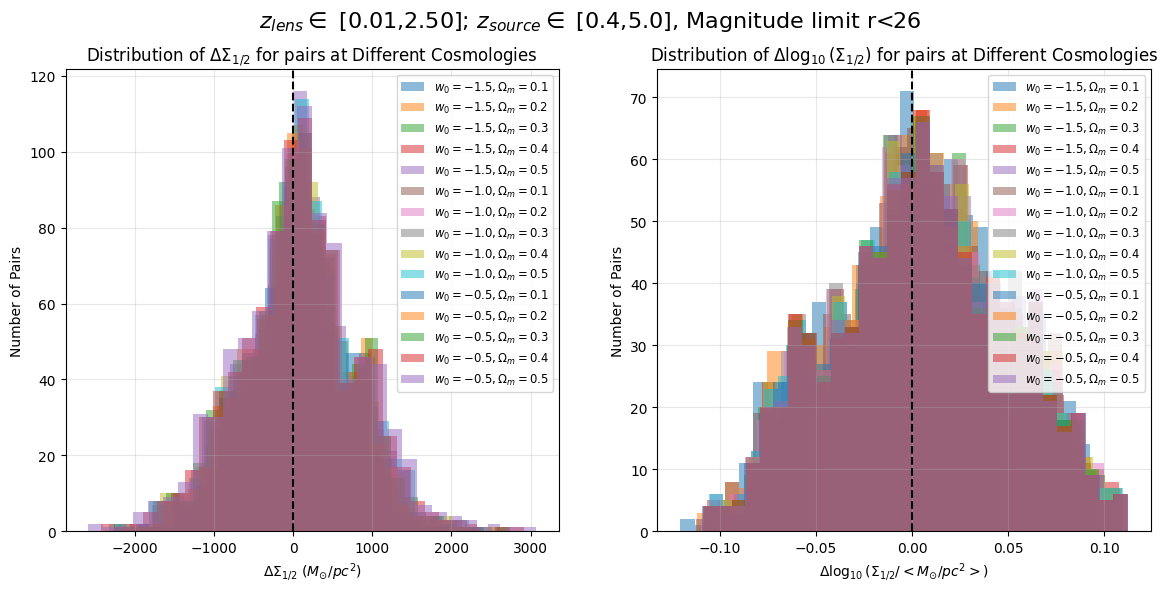

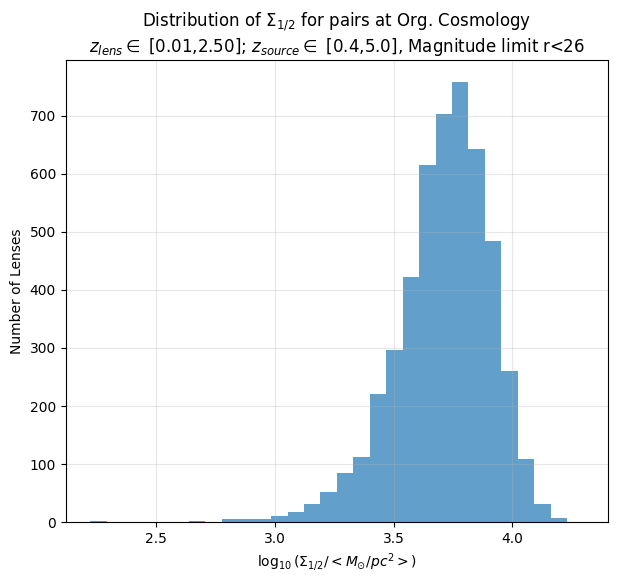

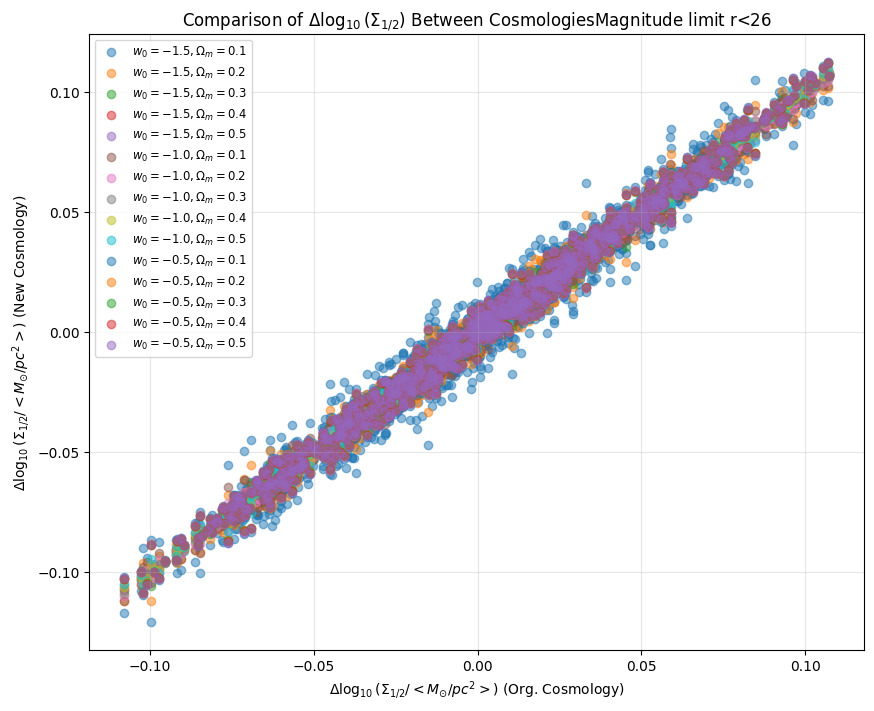

In [7]:
data = GGL_data_table.copy()
magnitude_limit_r = 26

num_pairs, pairs_table = run_pairing_simulation_from_data(
    data, mag_limit=magnitude_limit_r, threshold_rel_delta_z=0.01, 
    verbose=True, is_source_cut=True
)


# make a grid of cosmologies to test
w0_grid = np.array([-1.5, -1.0, -0.5])
Om0_grid = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
cosmo_org = Flatw0waCDM(H0=70 * u.km / (u.s * u.Mpc), Om0=0.3, w0=-1.0, wa=0)

delta_Sigma_half_old_all = np.ones((len(w0_grid), len(Om0_grid), num_pairs)) * np.nan
delta_Sigma_half_new_all = np.ones((len(w0_grid), len(Om0_grid), num_pairs)) * np.nan
log_delta_Sigma_half_old_all = np.ones((len(w0_grid), len(Om0_grid), num_pairs)) * np.nan
log_delta_Sigma_half_new_all = np.ones((len(w0_grid), len(Om0_grid), num_pairs)) * np.nan

for i, w0 in enumerate(w0_grid):
    for j, Om0 in enumerate(Om0_grid):
        cosmo_new = Flatw0waCDM(H0=70 * u.km / (u.s * u.Mpc), Om0=Om0, w0=w0, wa=0)
        delta_Sigma_half_old, delta_Sigma_half_new, log_delta_Sigma_half_old, log_delta_Sigma_half_new = find_difference_in_lensing_mass_density_for_pairs(data, pairs_table, cosmo_org, cosmo_new)
        delta_Sigma_half_old_all[i, j, :] = delta_Sigma_half_old
        delta_Sigma_half_new_all[i, j, :] = delta_Sigma_half_new
        log_delta_Sigma_half_old_all[i, j, :] = log_delta_Sigma_half_old
        log_delta_Sigma_half_new_all[i, j, :] = log_delta_Sigma_half_new


# plot histograms of delta_Sigma_half_new and log_delta_Sigma_half_new for each cosmology

# make two axes, one for delta_Sigma_half and one for log_delta_Sigma_half

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot histograms of delta_Sigma_half_new
for i, w0 in enumerate(w0_grid):
    for j, Om0 in enumerate(Om0_grid):
        axes[0].hist(delta_Sigma_half_new_all[i, j, :], bins=30, alpha=0.5, label=f'$w_0={w0}, \\Omega_m={Om0}$')
axes[0].set_xlabel('$\\Delta \\Sigma_{1/2}$ ($M_{\\odot} / pc^2$)')
axes[0].set_ylabel('Number of Pairs')
axes[0].set_title('Distribution of $\\Delta \\Sigma_{1/2}$ for pairs at Different Cosmologies')
axes[0].legend(loc ='upper right', fontsize='small')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(0, color='k', linestyle='--')
# axes[0].set_yscale('log')
# axes[0].set_xscale('log')

print("----- Statistics for log_delta_Sigma_half_new -----")
# Plot histograms of log_delta_Sigma_half_new
for i, w0 in enumerate(w0_grid):
    for j, Om0 in enumerate(Om0_grid):
        print(f"w0={w0}, Om0={Om0}: stddev = {np.nanstd(log_delta_Sigma_half_new_all[i, j, :]):.4f}, mean = {np.nanmean(log_delta_Sigma_half_new_all[i, j, :]):.4f}")
        axes[1].hist(log_delta_Sigma_half_new_all[i, j, :], bins=30, alpha=0.5, label=f'$w_0={w0}, \\Omega_m={Om0}$')

print("stddev of log_delta_Sigma_half_new values across cosmologies:", np.nanstd(log_delta_Sigma_half_new_all))
axes[1].set_xlabel('$\\Delta\\log_{10}( \\Sigma_{1/2}/<M_{\\odot} / pc^2>)$')
axes[1].set_ylabel('Number of Pairs')
axes[1].set_title('Distribution of $\\Delta\\log_{10}(\\Sigma_{1/2})$ for pairs at Different Cosmologies')
axes[1].legend(loc ='upper right', fontsize='small')
axes[1].grid(True, alpha=0.3)
axes[1].axvline(0, color='k', linestyle='--')
# axes[1].set_yscale('log')
# axes[1].set_xscale('log')
print("----------------------------------------------")

fig.suptitle('$z_{lens}\\in$ ['+f'{data['z_D'].min():.2f}'+','+f'{data['z_D'].max():.2f}'+']'+'; $z_{source}\\in$ ['+f'{data["z_S"].min():.1f},{data["z_S"].max():.1f}], Magnitude limit r<'+f'{magnitude_limit_r}', fontsize=16)



# for reference also plots the distribution of Sigma_half at the orginal cosmology

plt.figure(figsize=(7, 6))
plt.hist(np.log10(data['Sigma_half_Msun/pc2']), bins=30, alpha=0.7, color='C0')
plt.xlabel('$\\log_{10}( \\Sigma_{1/2}/<M_{\\odot} / pc^2>)$')
plt.ylabel('Number of Lenses')
plt.title('Distribution of $\\Sigma_{1/2}$ for pairs at Org. Cosmology\n'+'$z_{lens}\\in$ ['+f'{data['z_D'].min():.2f}'+','+f'{data['z_D'].max():.2f}'+']'+'; $z_{source}\\in$ ['+f'{data["z_S"].min():.1f},{data["z_S"].max():.1f}], Magnitude limit r<'+f'{magnitude_limit_r}')
plt.grid(True, alpha=0.3)
print("stddev of log10 Sigma_half values at org. cosmology:", np.nanstd(np.log10(data['Sigma_half_Msun/pc2'])))


plt.figure(figsize=(10, 8))
for i, w0 in enumerate(w0_grid):
    for j, Om0 in enumerate(Om0_grid):
        plt.scatter(log_delta_Sigma_half_old_all[i, j, :], log_delta_Sigma_half_new_all[i, j, :], alpha=0.5, label=f'$w_0={w0}, \\Omega_m={Om0}$')
plt.xlabel('$\\Delta\\log_{10}( \\Sigma_{1/2}/<M_{\\odot} / pc^2>)$ (Org. Cosmology)')
plt.ylabel('$\\Delta\\log_{10}( \\Sigma_{1/2}/<M_{\\odot} / pc^2>)$ (New Cosmology)')
plt.title('Comparison of $\\Delta\\log_{10}(\\Sigma_{1/2})$ Between Cosmologies'+f'Magnitude limit r<{magnitude_limit_r}')
plt.legend(loc ='upper left', fontsize='small')
plt.grid(True, alpha=0.3)

sig_int:     0.0000  110733321184.3852
Computing sig_int
sig_int:     0.0000  110733321184.3851
sig_int:     0.1512     -0.3867
sig_int:     0.1512     -0.3861
sig_int:     0.1036      0.3070
sig_int:     0.1247     -0.0974
sig_int:     0.1196     -0.0192
sig_int:     0.1184      0.0003
sig_int:     0.1185     -0.0007
Computing sig_int error
sig_int:     0.1184      0.0206
sig_int:     0.1512     -0.3664
sig_int:     0.1202     -0.0083
sig_int:     0.1197     -0.0001
sig_int:     0.1196      0.0009
Repeating at best fitting solution
sig_int:     0.1184      0.0003

################# Values and formal errors ################

        a =  -1.895 +/- 0.059
      b_0 =  -0.940 +/- 0.014
      b_1 =  2.614 +/- 0.028
  scatter =  0.1184 +/- 0.0012
Observed rms scatter: 0.118
y = a + (x_0 - p_0) b_0 + (x_1 - p_1) b_1
   p_0 = 0.000
   p_1 = 0.000
Adopted clip = 10.00*sigma; Fitted/Clipped = 4879/1
Non-clipped Spearman r = 0.83 and p = 0.0
Non-clipped Pearson r = 0.80 and p = 0.0
Execution ti

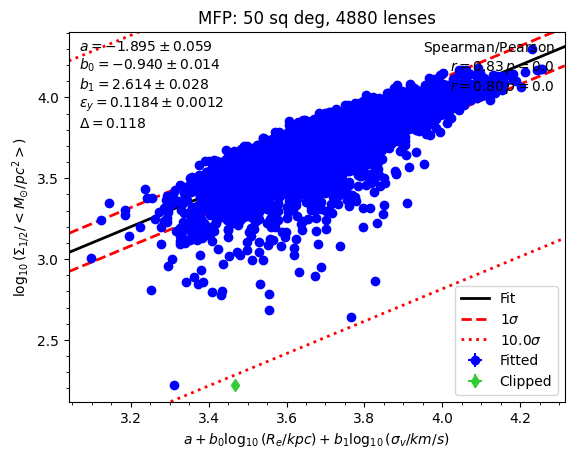

In [11]:
# draw the MFP with Sigma_half on y axis

x1 = np.log10(GGL_data_table["R_e_kpc"])
x2 = np.log10(GGL_data_table["sigma_v_D"])
y = np.log10(GGL_data_table["Sigma_half_Msun/pc2"])

#arrays
x1, x2, y = np.array(x1), np.array(x2), np.array(y)

x = np.column_stack([x1, x2])
sigx = np.ones_like(x)*0.0000001
sigy = np.ones_like(y)*0.0000001  # Example uncertainty for y

p = ltsfit(x, y, sigx, sigy, corr=True, epsy=True, clip = 10,
           frac=None, label='Fitted',
           legend=True,plot=True, text=True)

# label axes appropriately
plt.ylabel('$\\log_{10}( \\Sigma_{1/2}/<M_{\\odot} / pc^2>)$')
plt.xlabel('$a + b_0 \\log_{10}(R_e/kpc) + b_1 \\log_{10}(\\sigma_v/km/s)$')
plt.title(f'MFP: {50} sq deg, {len(x)} lenses')

print(f"Best fitting parameters: {p.coef}")
print(f"Scatter in log sigma_v: {p.sig_int} dex")
print(f"Scatter in sigma_v: {p.sig_int*np.log(10)*100:.2f} %")


In [58]:
mask = (GGL_data_table['mag_D_r'] < 24) & (GGL_data_table['mag_S_r'] < 24)

GGL_data_table[mask]

lens_id,z_D,z_S,theta_E,sigma_v_D,stellar_mass_D,mag_S_i,mag_S_r,mag_S_g,mag_S_z,mag_S_y,mag_D_i,mag_D_r,mag_D_g,mag_D_z,mag_D_y,size_D,e1_mass_D,e2_mass_D,e_mass_D,gamma_pl,R_e_kpc,Sigma_half_Msun/pc2,surf_bri_mag/arcsec2
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64
37,1.063091965850194,3.3133948986183075,0.6422378675242981,215.44236009347333,322277743173.92865,23.278456244626653,23.370417932323498,23.632409828688218,23.195504135531074,23.132754151573778,22.626899617788546,23.25078233579365,23.673000738951927,21.828757737367013,21.339600869286024,0.47889333792064875,-0.006646459617250302,0.008317800398322677,0.010647123034419951,2,3.887620520607209,5996.416232924403,24.530610528020592
39,1.130864101101034,2.4737462863666946,1.134275026689338,322.9183491322652,999646415127.992,23.576442806454907,23.71480671114483,23.862106894709093,23.567157502028714,23.41917638220736,21.58580046078247,22.205400389423094,22.56462814991499,20.88457913641849,20.33799886948523,0.9012420638637695,0.23080791533764264,0.08331727221335093,0.24538553672044738,2,7.403218850636128,6519.055659901237,24.805473097099902
57,0.3745408747440537,1.9648541319876067,0.948849766495961,214.53599496102223,319552611156.18695,23.10054185701933,23.141501498218126,23.29427805278418,22.922744058052608,22.790476474082297,18.640632371605207,19.151201884804777,20.41903073948069,18.32296642803722,18.174963620961215,1.2935806578743785,-0.019997969388200455,-0.010288248026473238,0.0224892602614144,2,6.672992037516773,1968.28857428955,23.46212355923083
82,0.08735512547649388,0.5971974632236927,0.687975434202141,169.2085871745265,145081577072.50406,22.439457803688885,23.15087568953778,24.03346866342886,22.182589191486226,21.9688742062577,15.875831404338822,16.26749545424725,17.086575998506508,15.619552939728532,15.468015497746624,1.0283639136797138,0.00040200399439713143,-0.0008182404725643246,0.0009116603986427941,2,1.6810956292235513,1937.715992226131,19.609325277110152
100,0.23074491088722293,1.4071222674920374,0.7649091329217595,184.7857472811958,199137393622.6551,21.326920051098924,21.591483214619842,21.761851073627156,21.165344493816313,20.764156753044823,17.85931038571798,18.324949768743526,19.462281875474797,17.635051398687242,17.43477457162683,0.919419427805336,0.0028001618733005658,-0.001391095593048136,0.0031266681092952733,2,3.386484528259163,2039.274601830494,21.738739736151423
104,0.6715056515192871,1.2512825715009508,0.9911299157788354,302.8857169817819,816953386459.9016,22.04053043535706,22.518918078410774,23.043327277704503,21.45354761680463,21.00898785987002,19.657571510612524,20.75063220874313,21.840736587958784,19.211148609647704,18.89078356108558,0.7604467385540495,0.16029318890903266,-0.014475604406789539,0.1609454862168203,2,5.342580505635573,6649.213804424573,23.70704665608565
206,0.47158720612716626,1.7820937737035378,1.2696877285991222,264.3884851139923,560633573959.3396,22.921266834904202,22.996096388873816,23.13036194458099,22.809643834076944,22.740470853362844,18.68475807649451,19.37008651138178,20.765661458241674,18.32948443031505,18.053811998429453,0.8844231293273657,0.1451418859738898,-0.08229269752736225,0.16684800007907666,2,5.229716757351839,4300.218963017572,22.983697816444327
207,1.1200470087175265,2.714661150147523,0.5881767606424234,223.32577331110542,357679911199.3965,23.57229117848255,23.668362761681763,23.689243807832092,23.572469628794934,23.576196635473842,22.95517609403426,23.946433671645753,24.990904605730858,22.08292410266561,21.463757778817875,0.41510519475428387,0.010142919455955973,-0.022212238437908555,0.02441848380863383,2,3.4040235156098047,6918.87014288542,25.53656433344283
240,0.6279140913937816,2.3342752878288584,0.985624359505243,240.10630943181806,435928465454.31323,23.096439624996766,23.24679656272932,23.45900409615577,22.969349741195646,22.747714890092293,20.075936488977415,21.2